# Final report analysis

## Setup

In [1]:
import os
PATH="/Users/david/Workspaces/claritycontrol/code/" # use your own path
os.chdir(PATH)

import numpy as np
import matplotlib
matplotlib.use('AGG')  # avoid some error in matplotlib
import matplotlib.pyplot as plt
import jgraph as ig
%matplotlib inline

# Load histograms
histograms = np.genfromtxt('./data/hist/histograms.csv', delimiter=',')

# Load roi featurs
fields = ['label','nbrain','nroi','roix','roiy','roiy','mean','std','energy','entropy','correlation','contrast','variance',
          'summean','inertia','cluster shade','cluster tendency','homogeneity','maxProbability','inverse variance']
data = np.genfromtxt('./data/roi_features/features.csv', delimiter=",", dtype=np.float32)# the features data have been pre-processed and merged
brain_nums = np.unique(data[:,1])
roi_nums = np.unique(data[:,2])

/Users/david/.envs/clarityenv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Covariance of histograms

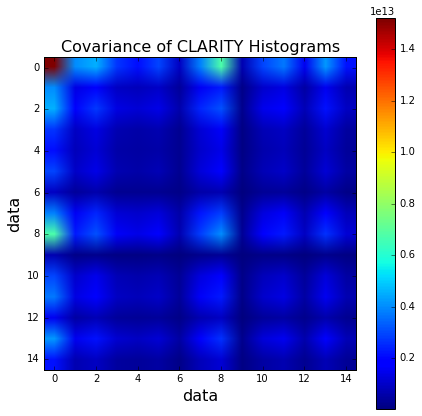

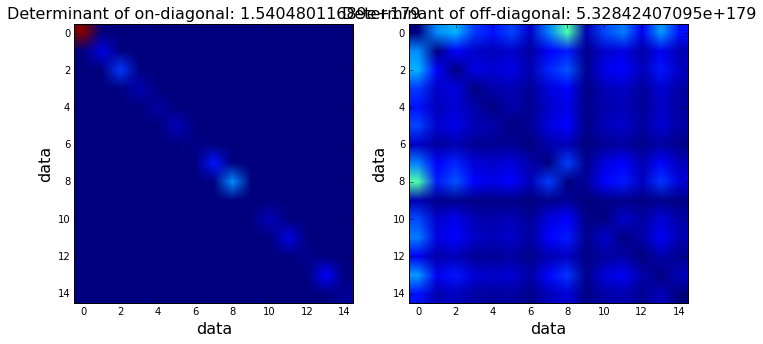

Ratio of on- and off-diagonal determinants: 0.289106140272


In [3]:
vectorized = histograms[98:107,:].T
covar = np.cov(vectorized)

plt.figure(figsize=(7,7))
plt.imshow(covar)
plt.title('Covariance of CLARITY Histograms', fontsize=16)
plt.xlabel('data', fontsize=16)
plt.ylabel('data', fontsize=16)
plt.colorbar()
plt.show()

diag = covar.diagonal()*np.eye(covar.shape[0])
hollow = covar-diag
d_det = np.linalg.det(diag)
h_det = np.linalg.det(hollow)

plt.figure(figsize=(11,8))
plt.subplot(121)
plt.imshow(diag)
plt.clim([0, np.max(covar)])
plt.title('Determinant of on-diagonal: ' + str(d_det), fontsize=16)
plt.xlabel('data', fontsize=16)
plt.ylabel('data', fontsize=16)
plt.subplot(122)
plt.imshow(hollow)
plt.clim([0, np.max(covar)])
plt.title('Determinant of off-diagonal: ' + str(h_det), fontsize=16)
plt.xlabel('data', fontsize=16)
plt.ylabel('data', fontsize=16)
plt.show()

print "Ratio of on- and off-diagonal determinants: " + str(d_det/h_det)

## Covariance of ROI features

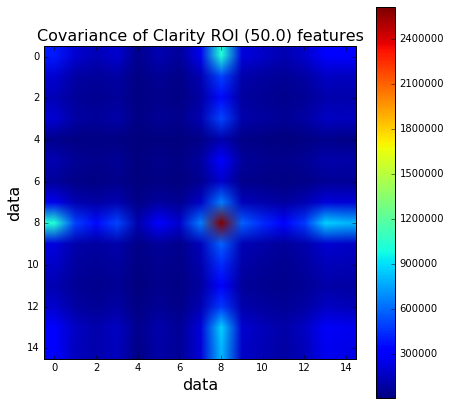

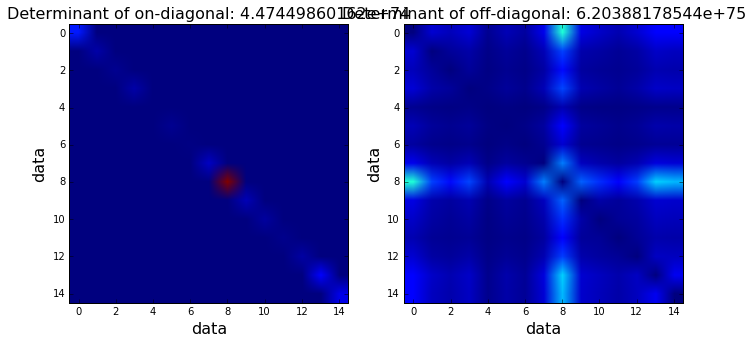

Ratio of on- and off-diagonal determinants: 0.0721241757399


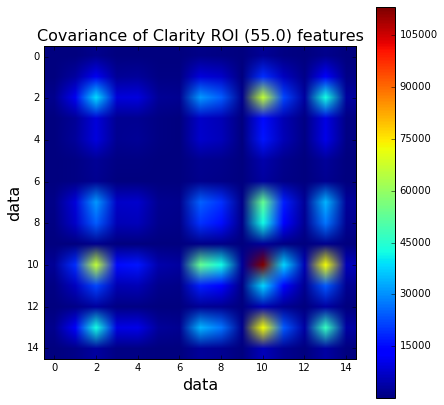

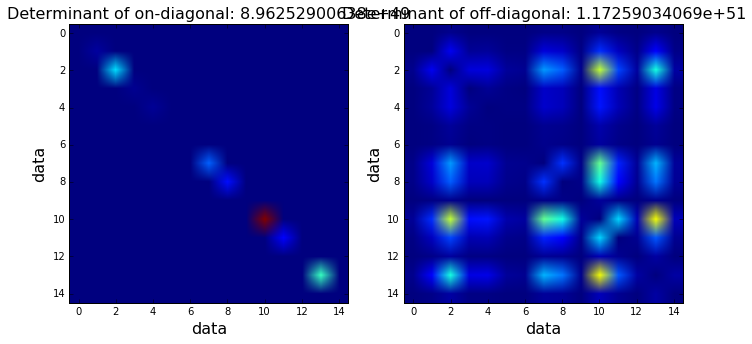

Ratio of on- and off-diagonal determinants: 0.0764335906185


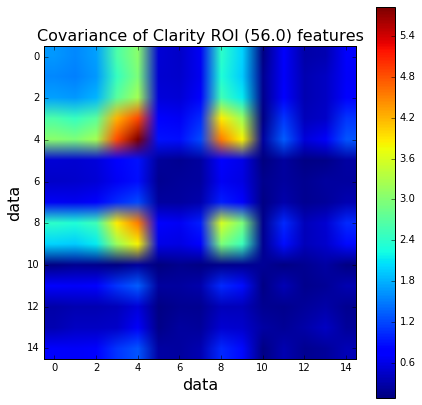

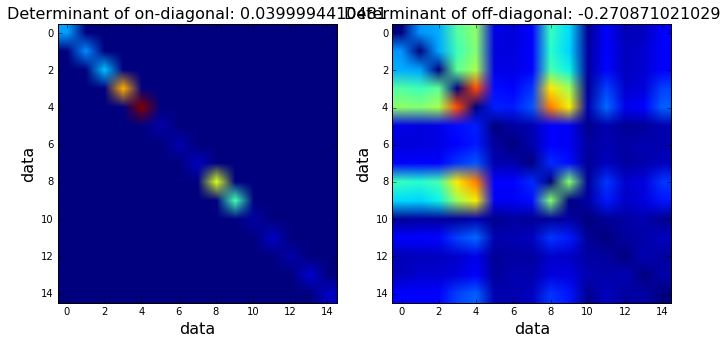

Ratio of on- and off-diagonal determinants: -0.147669694957


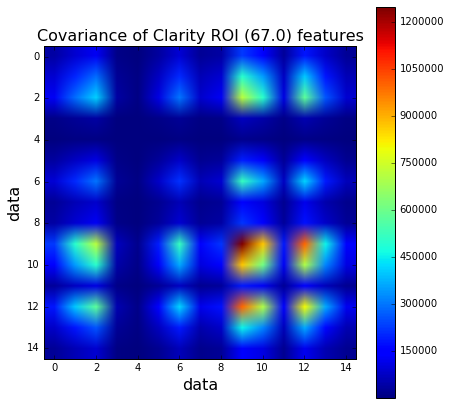

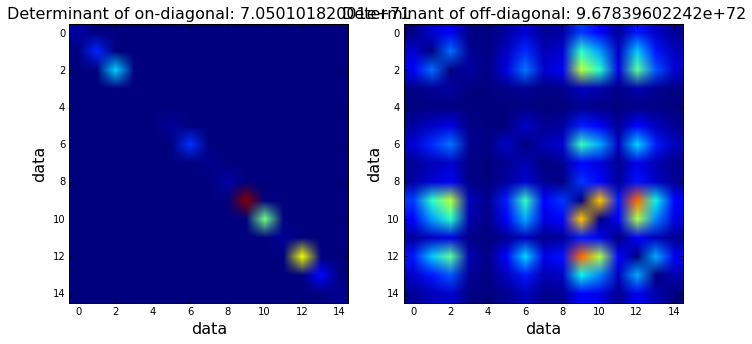

Ratio of on- and off-diagonal determinants: 0.072843700585


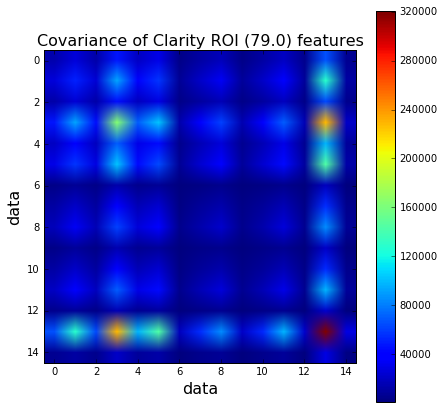

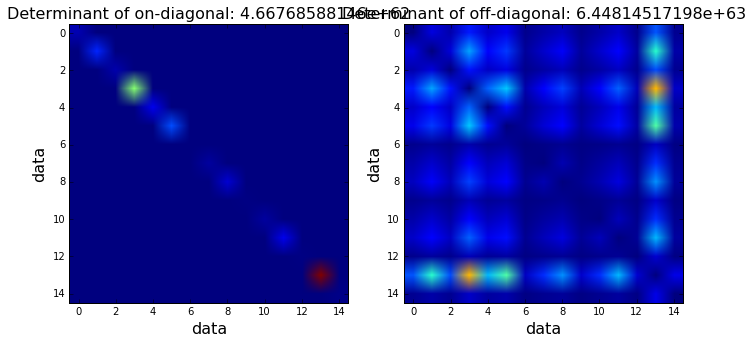

Ratio of on- and off-diagonal determinants: 0.0723880396141


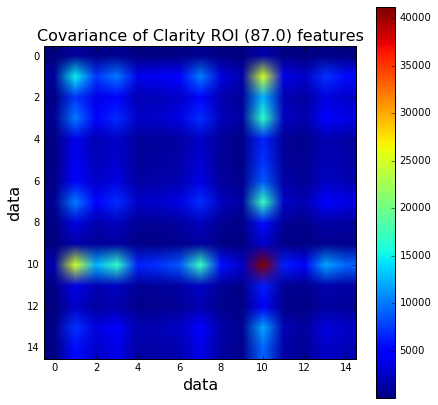

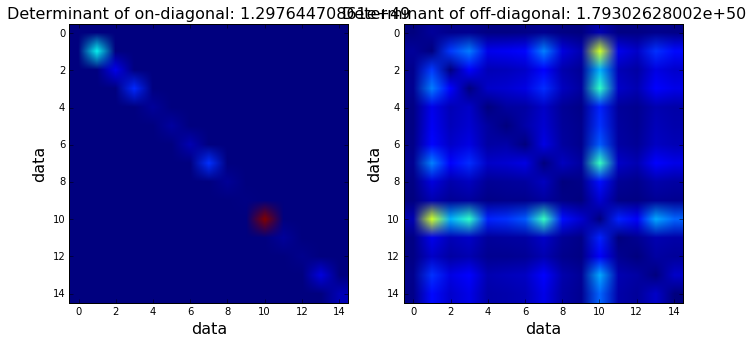

Ratio of on- and off-diagonal determinants: 0.0723717618124


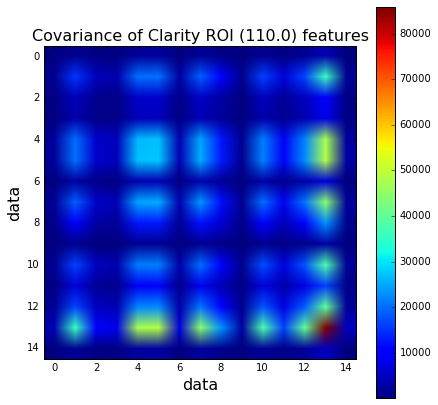

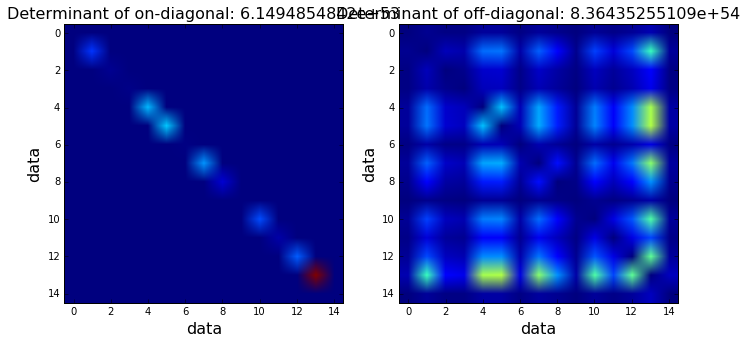

Ratio of on- and off-diagonal determinants: 0.0735201612634


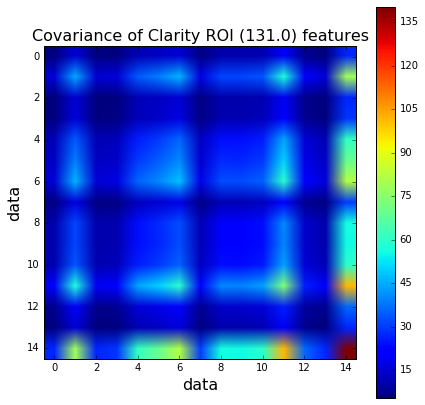

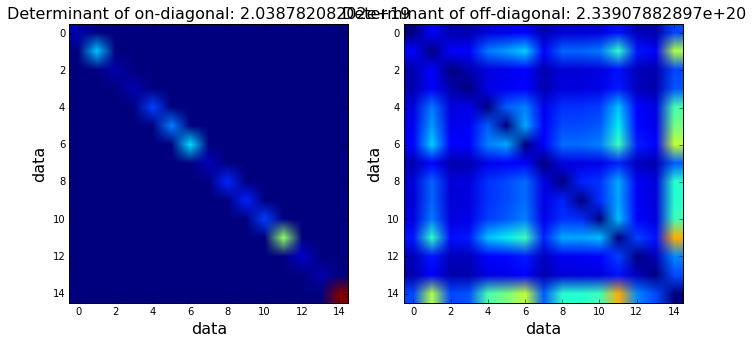

Ratio of on- and off-diagonal determinants: 0.0871617517444


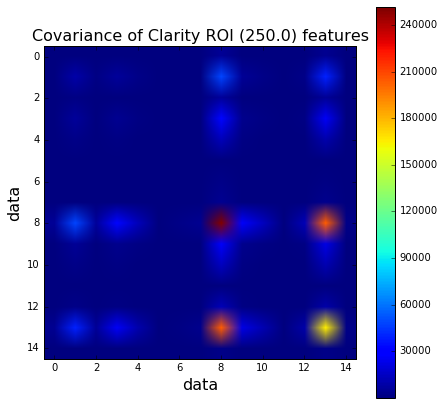

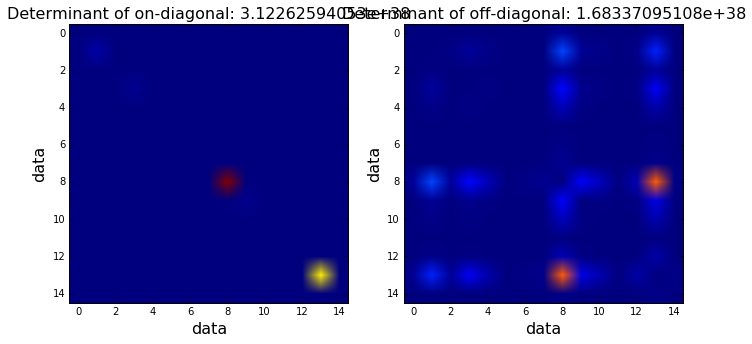

Ratio of on- and off-diagonal determinants: 1.85498385755


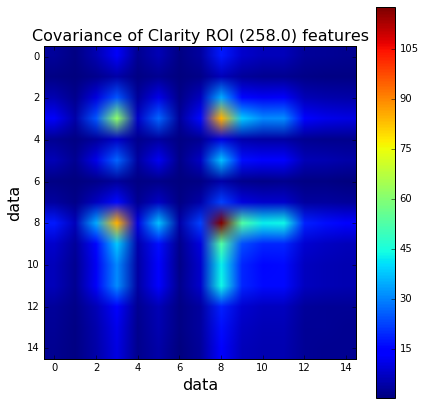

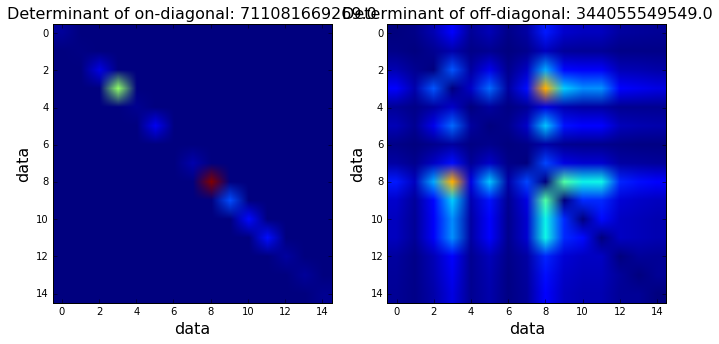

Ratio of on- and off-diagonal determinants: 2.06676413213


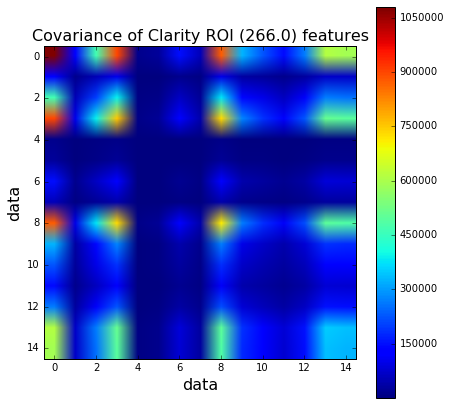

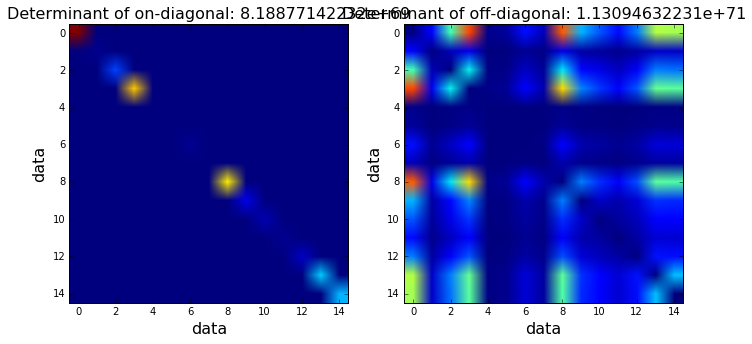

Ratio of on- and off-diagonal determinants: 0.0724063667812


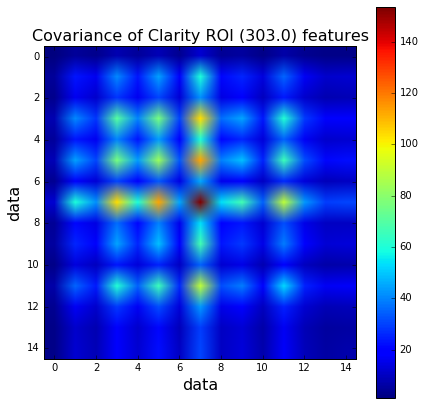

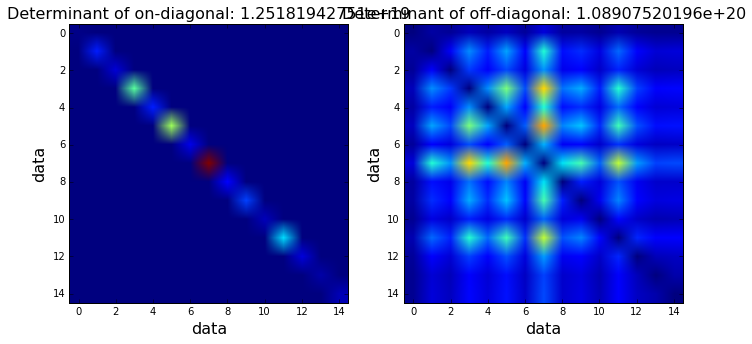

Ratio of on- and off-diagonal determinants: 0.114943341402


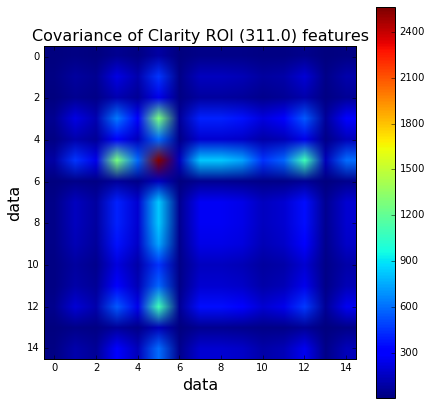

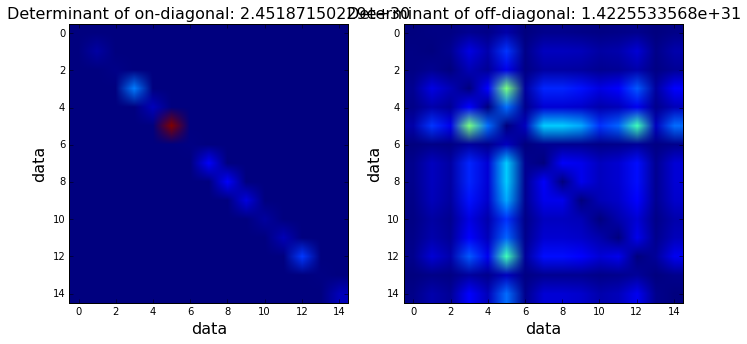

Ratio of on- and off-diagonal determinants: 0.172357085277


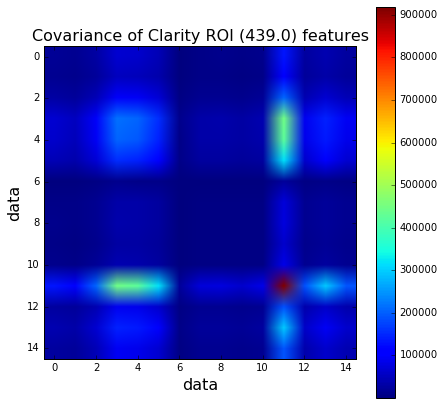

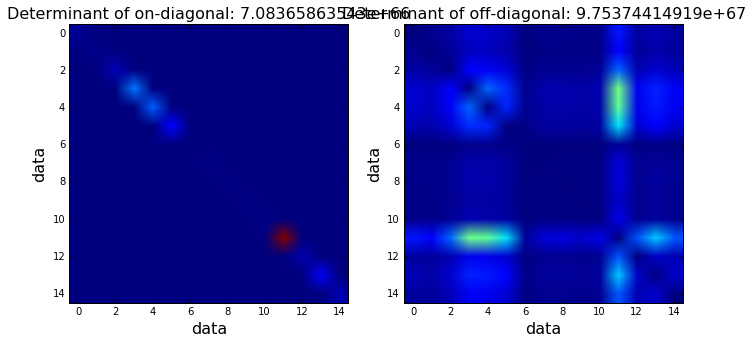

Ratio of on- and off-diagonal determinants: 0.0726250199624


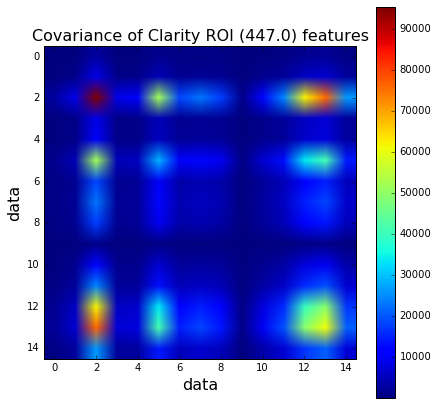

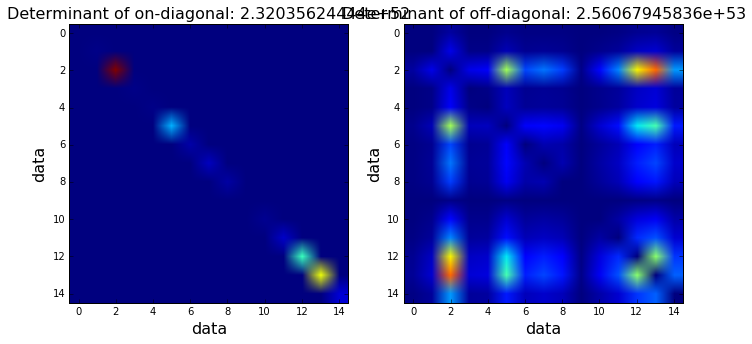

Ratio of on- and off-diagonal determinants: 0.0906148653971


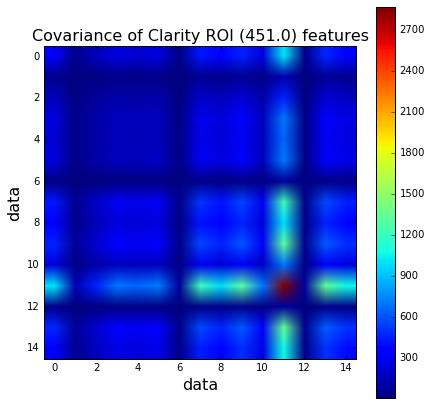

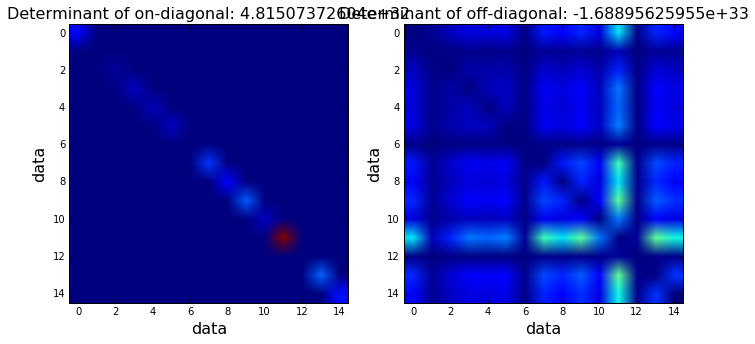

Ratio of on- and off-diagonal determinants: -0.285091677112


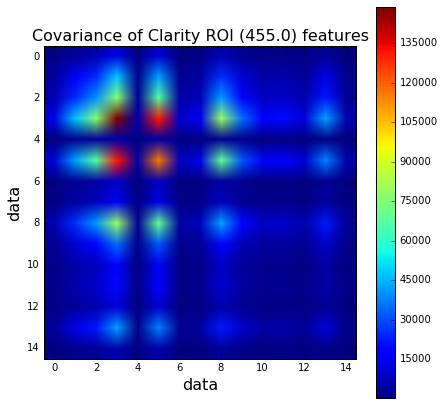

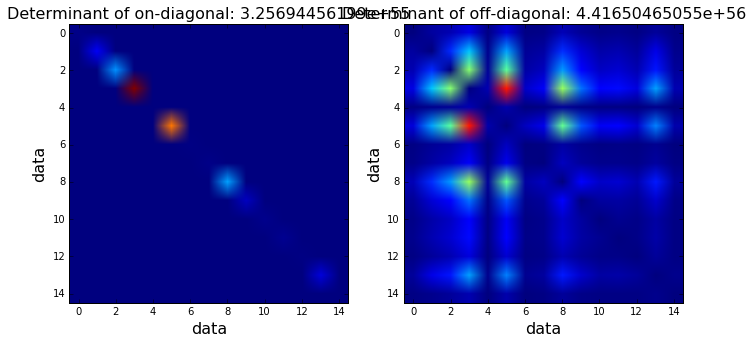

Ratio of on- and off-diagonal determinants: 0.0737448462004


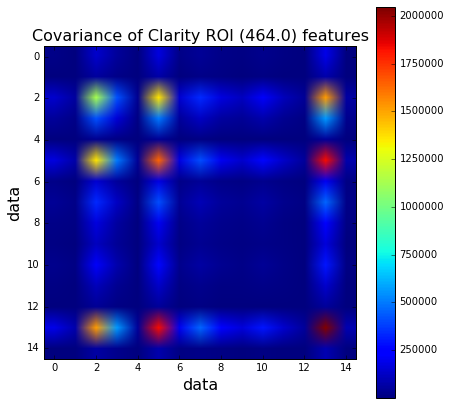

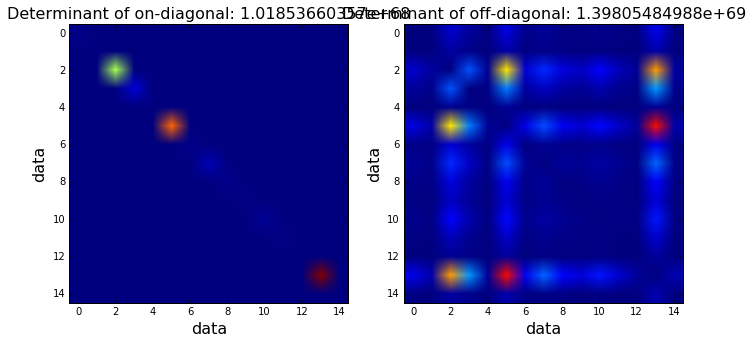

Ratio of on- and off-diagonal determinants: 0.0728538371479


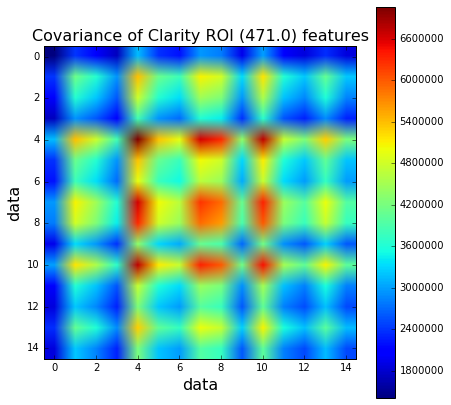

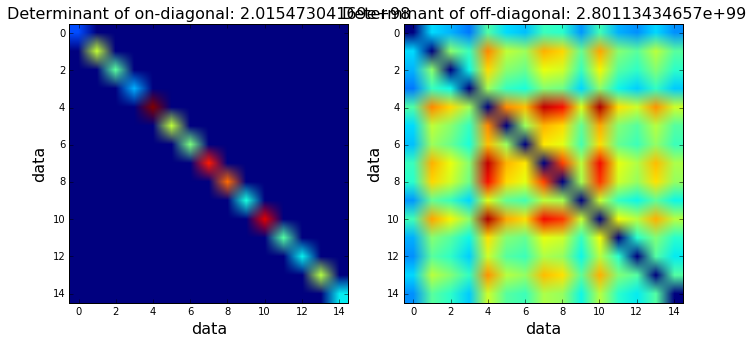

Ratio of on- and off-diagonal determinants: 0.071952030582


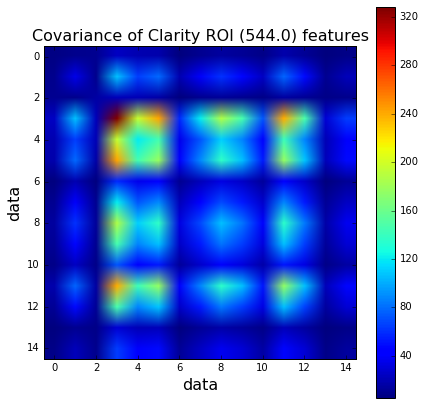

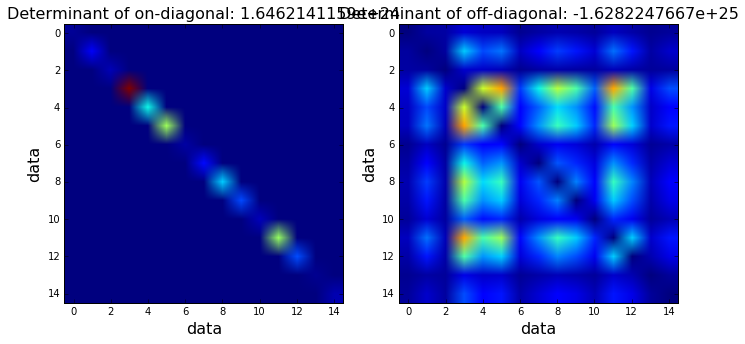

Ratio of on- and off-diagonal determinants: -0.101104844341


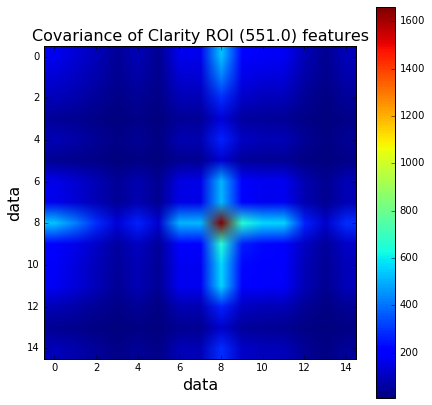

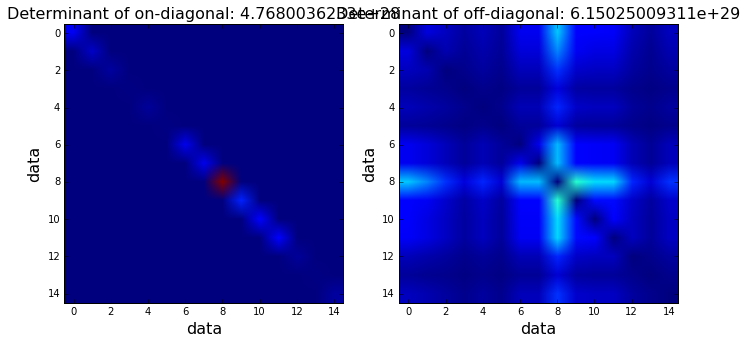

Ratio of on- and off-diagonal determinants: 0.0775253615888


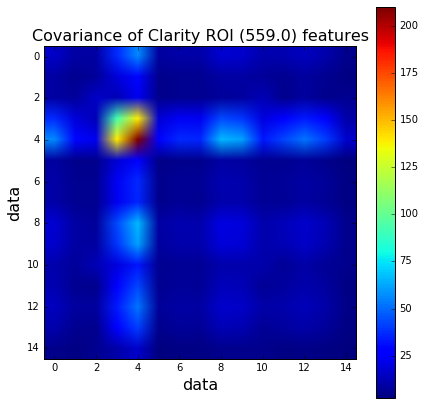

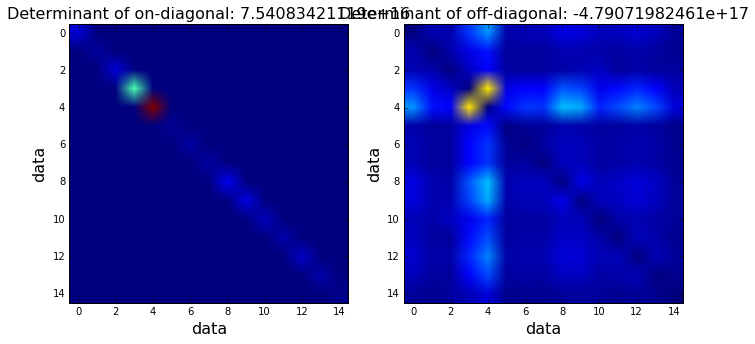

Ratio of on- and off-diagonal determinants: -0.157405034885


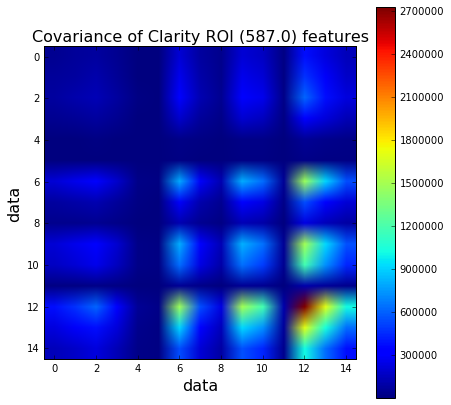

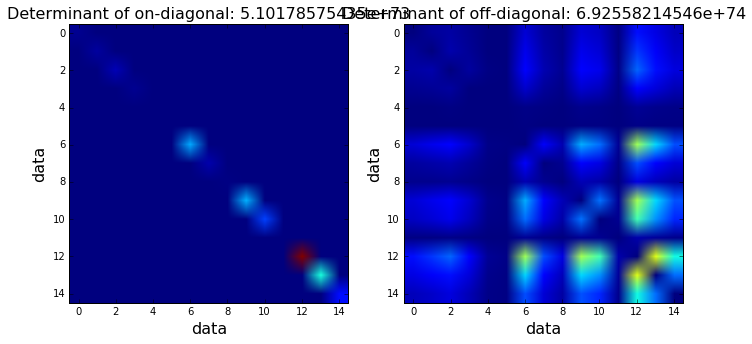

Ratio of on- and off-diagonal determinants: 0.0736658037866


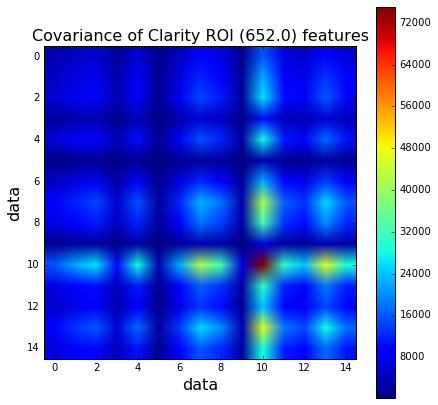

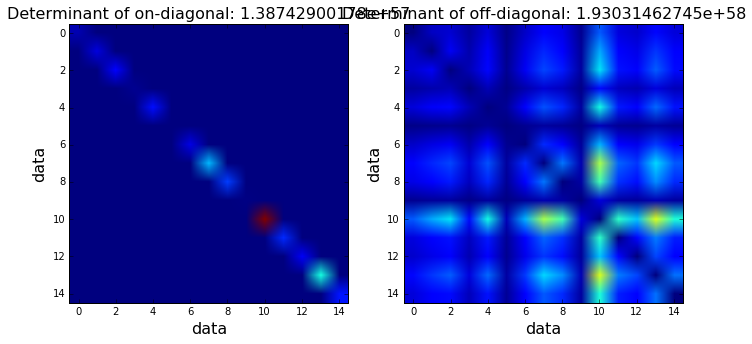

Ratio of on- and off-diagonal determinants: 0.0718757958963


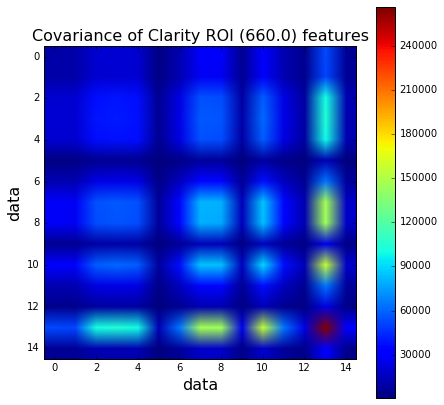

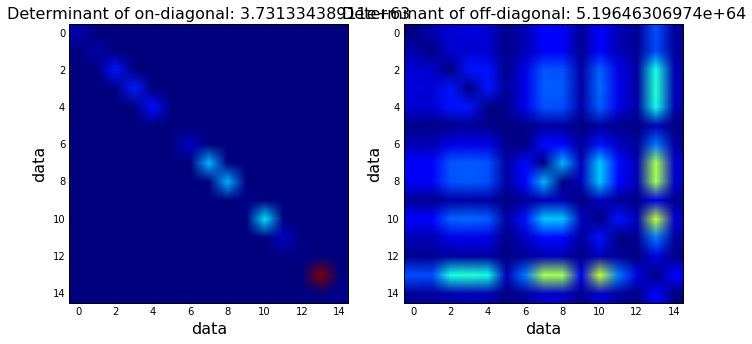

Ratio of on- and off-diagonal determinants: 0.0718052709897


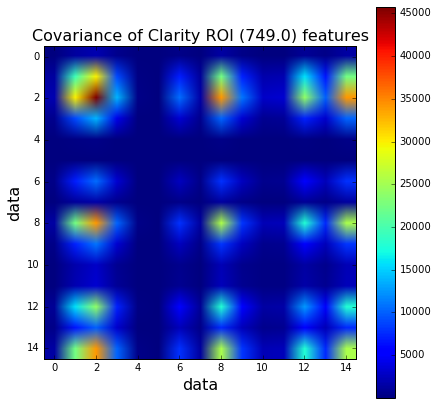

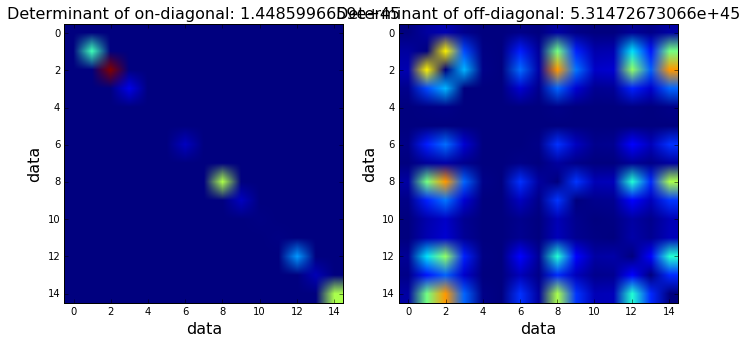

Ratio of on- and off-diagonal determinants: 0.272563339436


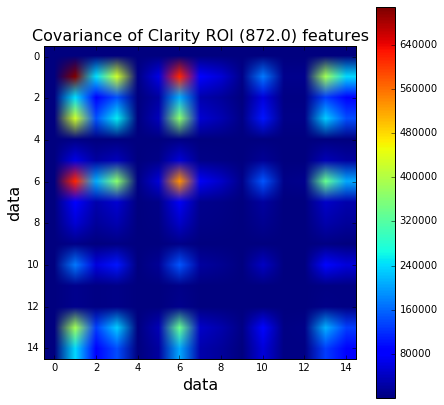

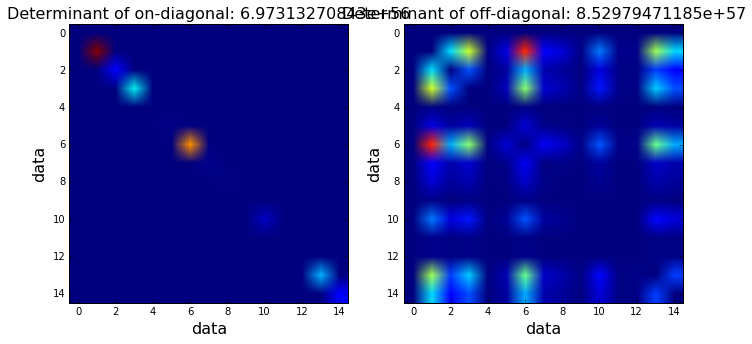

Ratio of on- and off-diagonal determinants: 0.0817502993213
[0.07212417573986471, 0.076433590618515249, -0.14766969495739071, 0.072843700585033894, 0.072388039614080732, 0.072371761812354357, 0.073520161263435274, 0.087161751744382537, 1.8549838575544308, 2.0667641321301948, 0.072406366781192513, 0.11494334140174699, 0.17235708527661653, 0.072625019962392567, 0.090614865397077873, -0.28509167711181244, 0.073744846200444594, 0.072853837147926592, 0.071952030582034351, -0.10110484434091455, 0.077525361588804187, -0.157405034885299, 0.073665803786626155, 0.071875795896297279, 0.071805270989743972, 0.27256333943574013, 0.081750299321335429]
The strongest indepent roi is [9]258.0


In [4]:
ratio=[]
for ROI_NUM in roi_nums:
    vectorized = data[data[:,2]==ROI_NUM, 6:]
    covar = np.cov(vectorized)

    plt.figure(figsize=(7,7))
    plt.imshow(covar)
    plt.title('Covariance of Clarity ROI (%s) features'%(ROI_NUM), fontsize=16)
    plt.xlabel('data', fontsize=16)
    plt.ylabel('data', fontsize=16)
    plt.colorbar()
    plt.show()

    diag = covar.diagonal()*np.eye(covar.shape[0])
    hollow = covar-diag
    d_det = np.linalg.det(diag)
    h_det = np.linalg.det(hollow)

    plt.figure(figsize=(11,8))
    plt.subplot(121)
    plt.imshow(diag)
    plt.clim([0, np.max(covar)])
    plt.title('Determinant of on-diagonal: ' + str(d_det), fontsize=16)
    plt.xlabel('data', fontsize=16)
    plt.ylabel('data', fontsize=16)
    plt.subplot(122)
    plt.imshow(hollow)
    plt.clim([0, np.max(covar)])
    plt.title('Determinant of off-diagonal: ' + str(h_det), fontsize=16)
    plt.xlabel('data', fontsize=16)
    plt.ylabel('data', fontsize=16)
    plt.show()

    print "Ratio of on- and off-diagonal determinants: " + str(d_det/h_det)
    ratio.append(d_det/h_det)
print ratio
n=ratio.index(max(ratio))
print "The strongest indepent roi is [%s]%s"%(n,roi_nums[n])

## Classifiers prepare

In [2]:
from sklearn import cross_validation
from sklearn.cross_validation import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
%matplotlib inline

np.random.seed(12345678)  # for reproducibility, set random seed

names = ["Nearest Neighbors", "Linear SVM", "Random Forest",
         "Linear Discriminant Analysis", "Quadratic Discriminant Analysis"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    LinearDiscriminantAnalysis()]

## Classification on histograms

In [15]:
accuracy = np.zeros((len(classifiers), 2), dtype=np.dtype('float64'))
X=histograms[98:107,:].T
y=np.repeat([0,1,2],5)
for idx, cla in enumerate(classifiers):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=0)
    clf = cla.fit(X_train, y_train)
    loo = LeaveOneOut(len(X))
    scores = cross_validation.cross_val_score(clf, X, y, cv=loo)
    accuracy[idx,] = [scores.mean(), scores.std()]
    print("Accuracy of %s: %0.2f (+/- %0.2f)" % (names[idx], scores.mean(), scores.std() * 2))

# plt.errorbar(S, accuracy[:,0,0], yerr = accuracy[:,0,1], hold=True, label=names[0])
# plt.errorbar(S, accuracy[:,1,0], yerr = accuracy[:,1,1], color='green', hold=True, label=names[1])
# plt.errorbar(S, accuracy[:,2,0], yerr = accuracy[:,2,1], color='red', hold=True, label=names[2])
# plt.errorbar(S, accuracy[:,3,0], yerr = accuracy[:,3,1], color='black', hold=True, label=names[3])
# plt.errorbar(S, accuracy[:,4,0], yerr = accuracy[:,4,1], color='brown', hold=True, label=names[4])
# plt.xscale('log')
# plt.xlabel('number of samples')
# plt.ylabel('accuracy')
# plt.title('Accuracy of classification under simulated data')
# plt.axhline(1, color='red', linestyle='--')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

Accuracy of Nearest Neighbors: 0.00 (+/- 0.00)
Accuracy of Linear SVM: 0.33 (+/- 0.94)
Accuracy of Random Forest: 0.07 (+/- 0.50)
Accuracy of Linear Discriminant Analysis: 0.47 (+/- 1.00)


## Classification on roi features